# Chapter 03. 회귀 알고리즘과 모델 규제_농어의 무게를 예측하라!

## 03-1. k-최근접 이웃 회귀
   
    keyword: 회귀, k-최근접 이웃 회귀, 결정계수, 과대적합과 과소적합

### [k-최근접 이웃 회귀]
지도 학습 알고리즘
1) 분류(classification): 샘플을 몇 개의 클래스 중 하나로 분류 (2장)
2) 회귀(regression): 임의의 어떤 숫자를 예측 -> 두 변수 사이의 상관관계를 분석하는 방법

- k-최근접 이웃 분류 알고리즘
    : 예측하려는 샘플에 가장 가까운 샘플 k개를 선택하고, 이 k개의 클래스를 확인하여 다수의 클래스를 새로운 샘플의 클래스로 예측

- k-최근접 이웃 회귀 알고리즘
    : 예측하려는 샘플에 가장 가까운 샘플 k개를 선택하고, k개의 샘플의 타깃값의 평균값을 새로운 샘플의 타깃의 수치로 예측  


### [데이터 준비]




In [31]:
#혼공머신은 농어의 길이만 있어도 무게를 예측할 수 있다고 생각 -> 농어의 길이 = 특성, 무게 = 타깃
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

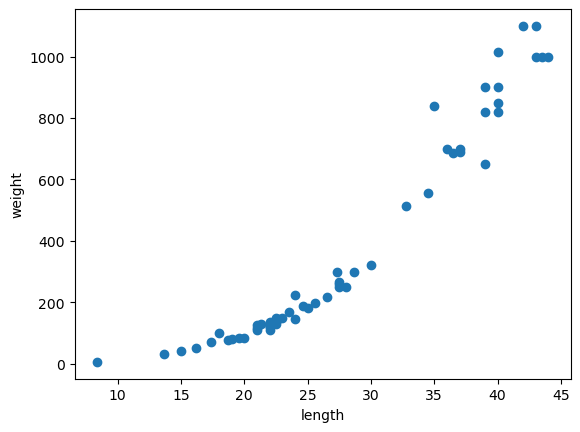

In [2]:
#데이터 형태 파악을 위한 산점도 생성
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
#농어 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [4]:
#사이킷런에 사용할 훈련 세트는 2차원 배열이어야 함
#perch_length = 1차원 배열 -> train_input과 test_input도 1차원 배열
#특성을 1개만 사용하므로 수동으로 2차원 배열을 만들어야 함


test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [5]:
#넘파이 배열의 reshape()메서드를 사용하여 배열의 크기를 바꿀 수 있음
#(4,) 배열을 (2, 2) 크기로 변형

test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


! reshape() 메서드에 지정한 크기가 원본 배열에 있는 원소 개수와 다르면 에러 발생 !
예를 들어 (4, ) 크기의 배열을 (2, 3)으로 바꾸려고 하면, 원본 배열의 원소는 4개인데 2x3 = 6개로 바꾸려고 하여 에러가 발생한다.

In [6]:
#reshape() 메서드를 사용하여 train_input과 test_input을 2차원 배열로 변형
#train_input의 크기는 (42, )임
#이를 2차원 배열인 (42, 1)로 바꾸려면 train_input.reshape(42, 1)과 같이 사용

#넘파이는 배열의 크기를 자동으로 지정하는 기능 제공
#크기에 -1을 지정하면 다른 차원을 채우고 남은 원소에 맞게 차원을 지정하라는 뜻
#예를 들어, 첫 번째 크기를 나머지 원소 개수에 맞게 설정하고, 두 번째 크기를 1로 하려면 train_input.reshape(-1, 1)
#reshap(-1, 1)과 같이 사용하면 배열의 전체 원소 개수를 매번 외우지 않아도 됨

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
#[결정계수 (R^2)]
#사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스 = KNeighborsRegressor
#객체 생성 후 fit() 메서드로 훈련

from sklearn.neighbors import KNeighborsRegressor

#객체 생성 후 knr이라는 변수에 저장
knr = KNeighborsRegressor()

#k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


분류의 경우, score는 샘플을 정확하게 분류한 개수의 비율 = 정확도

회귀에서는 정확한 숫자를 맞히는 것은 불가능
-> 예측하는 값이나 타깃 모두 임의의 수치이기 때문

회귀의 경우, 결정계수 (coefficient of determination, R^2)로 평가
R^2 = 1 - {(타깃 - 예측)^2의 합 / (타깃 - 평균)^2의 합}
-> 타깃의 평균 정도를 예측하는 수준이라면 (분자와 분모가 비슷해짐) = R^2는 0에 가까워짐
-> 예측이 타깃에 아주 가까워지면 (분자가 0에 가까워지므로) = R^2는 1에 가까워짐

In [8]:
#사이킷런은 sklearn.metrics 패키지 아래에 여러 측정 도구를 제공
#mean_absolute_error: 타깃과 예측의 절댓값 오차의 평균값 반환

from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측 생성
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있음

### [과대적합 vs 과소적합]

In [9]:
#훈련 세트의 R^2 점수 확인
print(knr.score(train_input, train_target))

0.9698823289099254


- 과대적합(overfitting): 훈련 세트 점수는 좋으나, 테스트 세트의 점수가 나쁠 때 -> 훈련 세트에 과대적합되었음 (훈련 세트에만 잘 맞는 모델)
- 과소적합(underfitting): 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수 모두 낮은 경우 -> 훈련 세트에 과소적합되었음 (모델이 너무 단순하여 적절히 훈련되지 않음)

- 훈련 세트와 테스트 세트의 점수를 비교했을 때,
    훈련 세트의 점수가 너무 높으면 과대적합
    훈련 세트의 점수가 너무 낮거나 두 세트의 점수 모두 낮으면 과소적합

- 과소적합의 원인: 훈련 세트와 테스트 세트의 크기가 매우 작을 때

- 과소적합 해결 방법
    : 모델을 더 복잡하게 만들기
    -> 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아짐

- k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법: 이웃의 개수 k를 줄이는 것
    -> 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 
        이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것
    
- 사이킷런의 k-최근접 이웃 클래스는 이웃의 개수를 바꾸기 위해 n_neighbors 속성값을 변경

In [10]:
#이웃의 개수를 3으로 줄임
knr.n_neighbors = 3

#모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [11]:
#k 값을 줄였더니 훈련 세트의 R^2 점수가 높아짐

#테스트 세트의 점수 확인
print(knr.score(test_input, test_target))

0.9746459963987609


예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제는 해결
또한, 두 점수의 차이가 크지 않으므로 과대적합도 아님

### [회귀 문제 다루기]

- 회귀: 임의의 수치를 예측하는 문제

k-최근접 이웃 회귀 모델은
1) 가까운 k개의 이웃을 찾음
2) 이웃 샘플의 타깃값을 평균하여 이 샘플의 예측값으로 사용

사이킷런은 회귀 모델의 점수로 R^2, 즉 결정계수 값을 반환  
-> R^2은 1에 가까울수록 좋음

정량적인 평가는 절댓값 오차와 같은 다른 평가 도구를 사용

- 훈련 세트의 점수와 테스트 세트의 점수 차이가 크면 좋지 않음
- 일반적으로 훈련 세트의 점수가 테스트 세트의 점수보다 조금 더 높음
- 테스트 세트 점수 <<< 훈련 세트 점수 = 과대적합
- 훈련 세트 점수 <<< 테스트 세트 점수 (or 두 점수 모두 낮음) = 과소적합

- 과대적합 해결 방법: 모델을 덜 복잡하게 만들기 -> k-최근접 이웃의 k값 증가
- 과소적합 해결 방법: 모델을 더 복잡하게 만들기 -> k-최근접 이웃의 k값 감소

## <<마무리>>

### [키워드로 끝내는 핵심 포인트]
- 회귀: '임의의 수치'를 예측, 타깃값 또한 임의의 수치
- k-최근접 이웃 회귀: k-최근접 이웃 알고리즘을 사용하여 가장 가까운 이웃 샘플을 찾고 이 샘플들의 타깃값을 '평균'하여 예측으로 삼음
- 결정계수(R^2): 대표적인 회귀 문제의 성능 측정 도구. 1에 가까울수록 좋고, 0에 가깝다면 성능이 나쁨
- 과대적합: 모델의 훈련 세트 성능 >>> 테스트 세트 성능 (훈련 세트에 너무 집착해서 데이터의 거시적인 패턴 감지 X)
- 과소적합: 모델의 훈련 세트와 테스트 세트의 성능이 모두 낮거나, 테스트 세트 성능 >>> 훈련 세트 성능 

### [핵심 패키지와 함수]

#### {scikit-learn}
- KNeighborsRegressor: k-최근접 이웃 회귀 모델을 만드는 사이킷런 클래스
                        n_neighbors 매개변수로 이웃의 개수를 지정, 기본값은 5
                        다른 매개변수는 KNeighborsClassifier 클래스와 거의 동일
- mean_absolute_error(): 회귀 모델의 평균 절댓값 오차를 계산
                        첫 번째 매개변수는 타깃, 두 번째 매개변수는 예측값을 전달
                        이와 비슷한 함수로 평균 제곱 오차를 계산하는 mean_squared_error() : 타깃과 예측을 뺀 값을 제곱한 다음 전체 샘플에 대해 평균한 값을 반환

#### {numpy}
- reshape(): 배열의 크기를 바꾸는 메서드. 바꾸고자 하는 배열의 크기를 매개변수로 전달. 바꾸기 전후의 배열 원소 개수는 동일해야 함
            넘파이는 종종 배열의 메서드와 동일한 함수를 별도로 제공. 이때 함수의 첫 번째 매개변수는 바꾸고자 하는 배열. 예) test_array.reshapte(2, 2)는 np.reshape(test_array, (2, 2))와 같이 바꿔쓸 수 있음


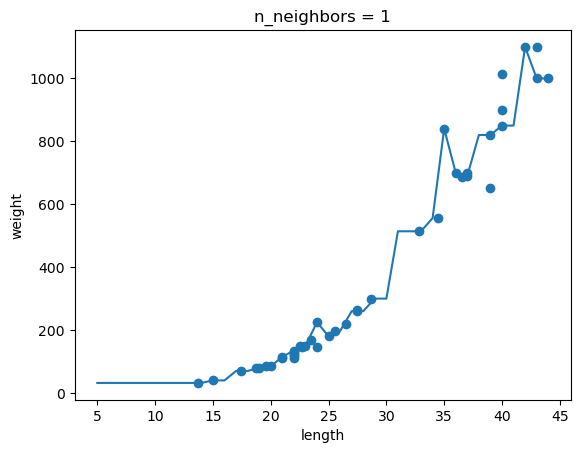

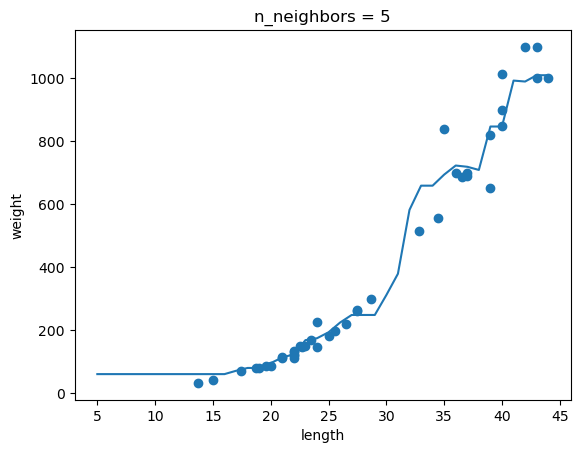

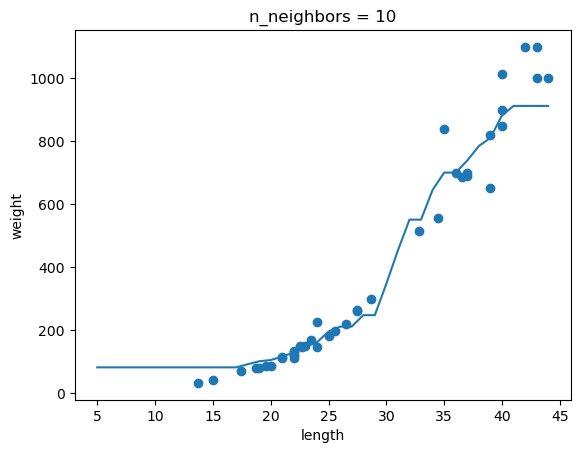

In [12]:
#확인문제 4. 과대적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델을 만들겠습니다. 앞서 만든 k-최근접 이웃 회귀 모델의 k값을 1, 5, 10으로 바꿔가며 훈련해보세요. 그다음 농어의 길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프로 나타내보세요. n이 커짐에 따라 모델이 단순해지는 것을 볼 수 있나요

#k-최근접 이웃 회귀 객체를 만듬
knr = KNeighborsRegressor()

#5에서 45까지 x좌표를 만듬
x = np.arange(5, 45).reshape(-1, 1)

#n = 1, 5, 10일 때 예측 결과를 그래프로 그림
for n in [1, 5, 10]:
    #모델을 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    #지정한 범위 x에 대한 예측을 구하기
    prediction = knr.predict(x)

    #훈련 세트와 예측 결과를 그래프로 긂
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show() 

## 03-2. 선형 회귀

keyword: 선형회귀, 계수 또는 자중치, 모델 파라미터, 다항회귀

### [k-최근접 이웃의 한계]

In [13]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

#훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

#최근접 이웃 개수 = 3으로 하는 모델을 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

#이 모델을 사용하여 길이가 50cm인 농어의 무게를 예측
print(knr.predict([[50]]))

[1033.33333333]


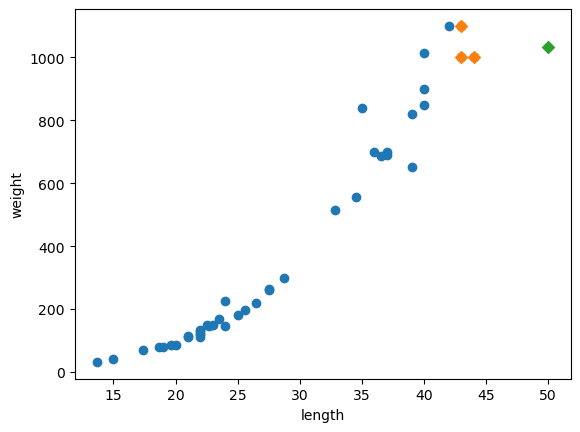

In [14]:
#Trouble shooting
#사이킷런 k-최근접 이웃 모델의 kneighbors() 메서드를 사용하여 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있음

import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터
plt.scatter(50, 1033, marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
#50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 k-최근접 이웃 알고리즘은 샘플들의 무게를 평균
#이웃 샘플의 타깃의 평균을 구하기
print(np.mean(train_target[indexes]))

1033.3333333333333


k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균함.

따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음

예를 들어 길이가 100cm인 농어도 여전히 1,033g으로 예측함

In [16]:
print(knr.predict([[100]]))

[1033.33333333]


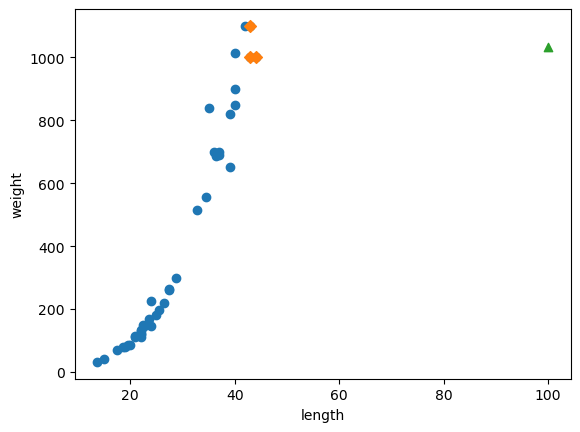

In [17]:
#100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### [선형 회귀]

- 선형 회귀(linear regression): 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

- 사이킷런은 sklearn.linear_model 패키지 아래에 LinearRegression 클래스로 선형 회귀 알고리즘을 구현

- LinearRegression 클래스에도 fit(), score(), predict()

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [19]:
# 선형 회귀는 y = ax + b처럼 작동
# 농어 무게 = a x 농어 길이 + b

# LinearRegression 클래스가 찾은 a와 b는 lr 객체의 coef_와 intercept_속성에 저장

print(lr.coef_, lr.intercept_)
#coef = 종종계수(coefficient) 또는 가중치(weight)라고 부름

[39.01714496] -709.0186449535477


- coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 '모델 파라미터(model parameter)'라고 부름.

- 모델 기반 학습: 최적의 모델 파라미터를 찾는 알고리즘의 훈련 과정

- 사례 기반 학습: 모델 파라미터 없이 훈련 세트를 저장하는 것이 훈련의 전부인 과정

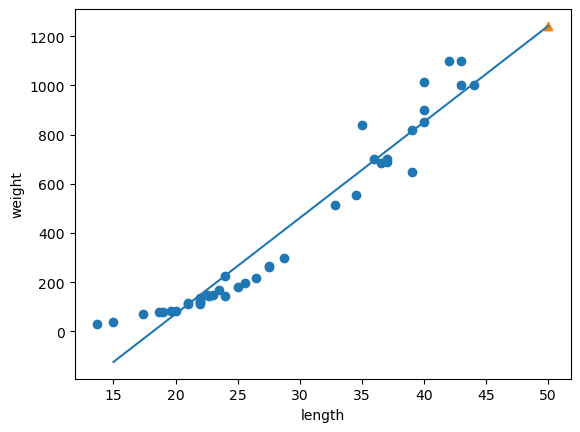

In [20]:
#기울기와 절편을 사용하여 (15, 15x39-709)와 (50, 50x39-709) 두 점을 잇기

#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위의 직선이 선형 회귀 알고리즘이 찾은 최적의 직선

-> 길이가 50cm인 농어에 대한 예측은 직선의 연장선에 위치 (성공)

In [21]:
#훈련 세트와 테스트 세트에 대한 R^2 점수 확인
print(lr.score(train_input, train_target)) #훈련 세트
print(lr.score(test_input, test_target)) #테스트 세트

0.939846333997604
0.8247503123313558


### [다항 회귀]

선형 회귀가 만든 직선은 왼쪽 아래(음수 방향)로 쭉 뻗어 있음
    -> 농어의 무게가 0g이하로 내려감 (X)

농어의 길이와 무게에 대한 산점도를 보면 일직선(X) -> 왼쪽 위로 조금 구부러진 곡선
    -> 무게 = a x (길이)^2 + b x 길이 + c

2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 함
    -> 넘파이를 활용

In [22]:
#column_stack() 함수를 사용하여 (train_input)^2, train_input 두 배열을 나란히 붙이기

train_poly = np.column_stack((train_input**2, train_input)) 
test_poly = np.column_stack((test_input**2, test_input))
#train_input**2식에도 넘파이 브로드캐스팅이 적용 = train_input에 있는 모든 원소를 제곱

print(train_poly.shape, test_poly.shape) #길이의 제곱을 추가하였으므로 열이 2개로 늘어남

(42, 2) (14, 2)


In [23]:
#주목: 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용한다는 점
#목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요 X

#train_poly를 활용하여 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [24]:
#모델 훈련 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


이 모델은 다음과 같이 학습함

무게 = 1.01 x (길이)^2 - 21.6 x (길이) + 116.05

선형 회귀에서 **'선형'**은 입력과 타깃 사이의 관계가 아니라 **'가중치(계수)**와 **타깃** 사이의 관계'를 의미
    
    따라서, 길이를 제곱하거나 세제곱하더라도 여전히 선형 회귀로 다룰 수 있음

이러한 방정식을 다항식(polynomial)이라고 부르며, 다항식을 사용한 선형 회귀를 **'다항 회귀(polynomial regression)'**이라고 부름

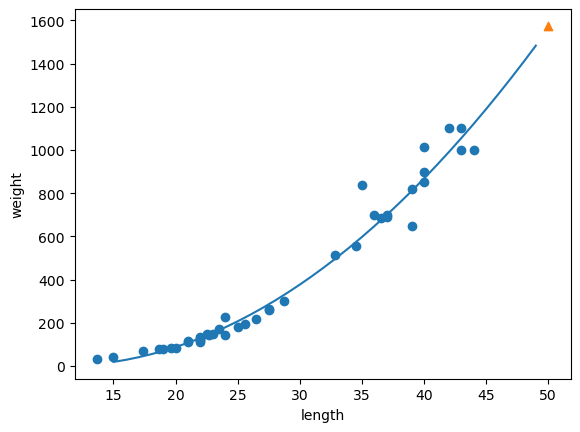

In [25]:
#훈련 세트의 산점도에 그래프로 그려보기
#짧은 직선을 이어서 그리면 마치 곡선처럼 표현 가능
#1씩 짧게 끊어서 그려 보겠음

#구간별 직선을 그리기 휘애 15에서 49까지 정수 배열을 만듬
point = np.arange(15, 50)

#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
#훈련 세트와 테스트 세트의 R^2 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


여전히 테스트 세트의 점수가 더 높음 = 과소적합이 남아있음

-> 더 복잡한 모델이 필요

### [선형 회귀로 훈련 세트 범위 밖의 샘플 예측_문제해결 과정]

* k-최근접 이웃 회귀를 사용해서 농어의 무게를 예측했을 때 발생하는 큰 문제  
> => 훈련 세트 범위 밖의 샘플을 예측할 수 없음

* k-최근접 이웃 회귀는 아무리 멀리 떨어져 있어도 무조건 '가장 가까운 샘플의 타깃을 평균'하여 예측  
> -> 선형 회귀를 사용

* 선형 회귀: 훈련 세트에 잘 맞는 직선의 방정식을 찾는 것

* 사이킷런의 LinearRegression 클래스를 사용하면 k-최근접 이웃 알고리즘과 동일한 방식으로 모델 훈련 및 예측 사용 가능

* 가장 잘 맞는 직선의 방정식을 찾는다 = 최적의 기울기와 절편을 구한다

* 이 값들은 선형 회귀 모델의 'coef_'와 'intercept_'속성에 저장

* 선형 회귀 모델은 훈련 세트를 벗어난 범위의 데이터도 잘 예측
/ 하지만 모델이 단순하여 음수가 나올 수 없는 세트에서도 음수 반환 가능

* 이 문제를 해결하기 위해 '다항 회귀'를 사용

<<마무리>>

[키워드로 끝내는 핵심 포인트]
- 선형 회귀: 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식. 특성이 하나면 직선 방정식이 됨

- 선형 회귀가 찾은 특성과 타깃 사이의 관계 -> 선형 방정식의 '계수' 또는 '가중치'에 저장

- 모델 파라미터: 선형 회귀가 찾은 가중치처럼 모델이 특성에서 학습한 파라미터

- 다항 회귀: 다항식을 사용하여 특성과 타깃 사이의 관계를 나타냄. 비선형일 수 있지만 여전히 선형 회귀로 표현 가능

[핵심 패키지와 함수]

{scikit-learn}
- LinearRegression: 사이킷런의 선형 회귀 클래스

fit_intercept 매개변수를 False로 지정하면 절편을 학습하지 않음. 기본값은 True

학습된 모델의 coef_ 속성은 특성에 대한 계수를 포함한 배열. 배열의 크기 = 특성의 개수

intercept_ 속성에는 절편이 저장되어 있음




03-3. 특성 공학과 규제  
keyword: 다중 회귀, 특성 공학, 릿지, 라쏘, 하이퍼파라미터

- 선형 회귀는 특성이 많을수록 성능이 올라감
- 사이킷런의 PolynomialFeatures 클래스 사용

[다중 회귀]

- 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것 = 직선
- 2개의 특성을 사용하면 '평면'을 학습
- 2개의 특성이면 타깃값과 함께 '3차원 공간'을 형성, 선형 회귀 방정식 '타깃 = a x 특성1 + b x 특성2 + 절편' => 평면

- 특성 공학(feature engineering): 기존 특성을 사용해 새로운 특성을 뽑아내는 작업


[데이터 준비]

- 판다스(pandas): 데이터 분석 라이브러리
- 데이터프레임(dataframe): 판다스의 핵심 데이터 구조

- 판다스 데이터 프레임 -> 'CSV 파일'
- 판다스의 read_csv() 함수에 주소를 넣으면 입력

In [27]:
import pandas as pd #pd는 관례적으로 사용하는 판다스의 별칭
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


- 판다스 데이터 프레임 입력과 넘파이 배열 입력의 성능 차이  
: 사이킷런에 데이터프레임을 입력하면 넘파이 배열로 바꾸어 훈련함 - 성능 차이 X

In [28]:
import numpy as np

# perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
#        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
#        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
#        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
#        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
#        44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#perch_ful과 perch_weight를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

[사이킷런의 변환기]  

- 변환기(transformer): 사이킷런의 특성을 만들거나 전처리를 위한 다양한 클래스  
cf. LinearRegression과 같은 사이킷런 모델 클래스는 추정기(estimator)라고도 부름

In [29]:
#PolynomialFeatures 클래스 변환기 사용 (sklearn.preprocessing 모듈에 포함)
from sklearn.preprocessing import PolynomialFeatures

#2개의 특성 2와 3으로 이루어진 샘플 하나 적용
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


- transform 전에 꼭 poly.fit을 사용해야하는지?  
-> 훈련(fit)을 해야 변환(transform)이 가능  
-> 또는, 두 메서드를 하나로 붙인 fit_transform 메서드도 있음  

- 변환기는 **타깃 데이터 없이** 입력 데이터를 변환  
> -> fit() 메서드에 입력 데이터만 전달

- PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가

무게 = a x 길이 + b x 높이 + c x 두께 + d x 1

- 선형 방정식의 절편 = 항상 값이 1인 특성과 곱해지는 계수  
> -> 특성 = (길이, 높이, 두께, 1)
> -> 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요 X

-> include_bias = False로 지정하여 특성 변환

In [32]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


-> 절편을 위한 항이 제거되고 특성의 제곱과 특성끼리 곱한 항만 추가

* incluse_bias=False로 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항 무시

In [33]:
#train_input에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [34]:
#get_feature_names_out() 메서드를 호출하여 9개 특성의 입력 조합 확인
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

'length^2' = (길이 특성)^2  
'length height' = (길이 특성) x (높이 특성)

In [35]:
#테스트 세트로 변환
test_poly = poly.transform(test_input)

### [다중 회귀 모델 훈련하기]

In [36]:
#사이킷런의 LinearRegression 클래스 임포트, train_poly 사용하여 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


-> 농어의 길이 + 높이 + 두께 모두 사용하여 다항 특성을 더 추가하여 성능이 강해짐

In [37]:
#테스트 세트에 대한 점수 확인
print(lr.score(test_poly, test_target))

0.9714559911594155


In [38]:
#5제곱까지 특성 만들어 출력
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


만들어진 특성 개수 = 55개  
위 데이터를 활용하여 선형 회귀 모델을 훈련

In [39]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [40]:
#테스트 세트에 대한 점수
print(lr.score(test_poly, test_target))

-144.40744533753661


- 특성의 개수를 크게 늘리면 선형 모델은 아주 강력(훈련 세트에 대해 거의 완벽하게 학습)해지는 반면,  
> 훈련 세트에 과대적합되므로 테스트 세트에서는 형편없는 점수

### [규제]
- **규제(regulation)**: 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록, 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
- 선형 회귀 모델에서는 특성에 곱해지는 **계수(또는 기울기)의 크기**를 **작게** 만듬   
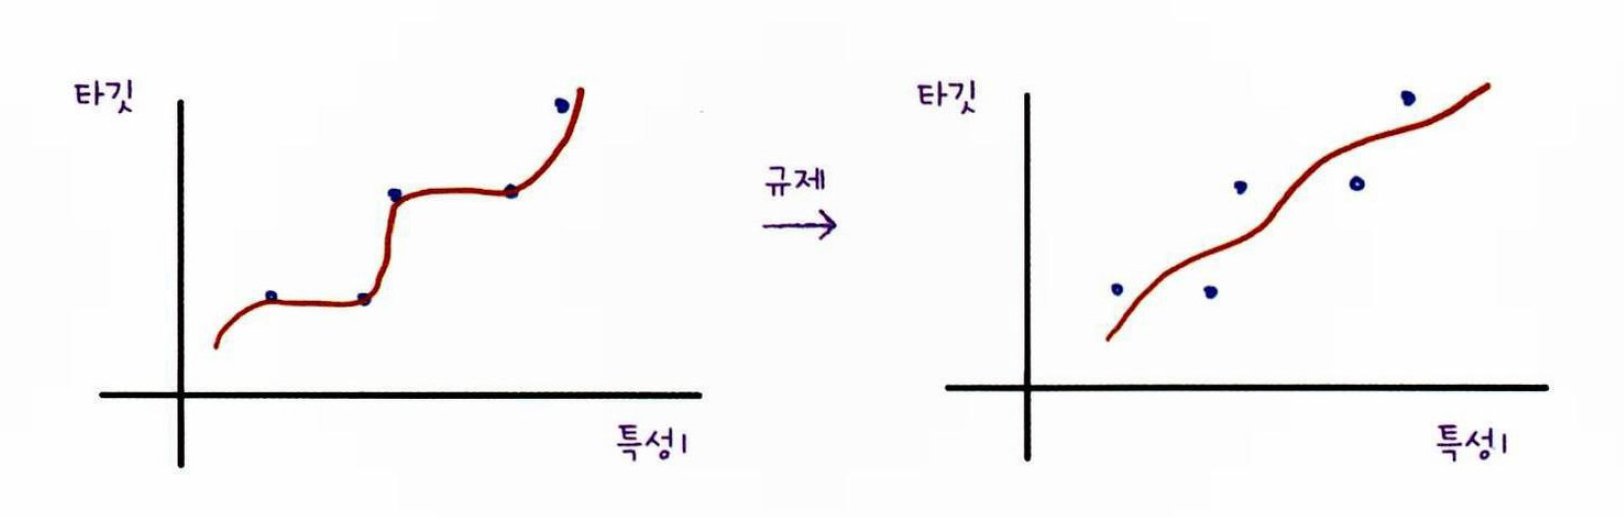   

- 특성의 스케일이 정규화되지 않으면 계수 값도 차이나게 됨
- 일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어 X  
> -> **규제를 적용하기 전에 정규화 먼저!**

**사이킷런에서 제공하는 StandardScaler 클래스**를 사용


In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

StandardScaler 클래스의 객체 ss를 초기화  
PolynomialFeatures 클래스로 만든 train_poly를 사용해 객체 훈련  
**훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환**
 
이제 표준점수로 변환한 train_scaled와 test_scaled가 준비    
**note** 훈련 세트에서 학습한 평균과 표준편차 -> StandardScaler 클래스 객체의 mean_, scale_ 속성에 저장 / 특성마다 계산하므로 55개의 평균과 표준 편차가 들어있음

선형 회귀 모델에 규제를 추가한 모델을 **릿지(ridge)**와 **라쏘(lasso)**라고 부름.  
**릿지**: 계수를 제곱한 값을 기준으로 규제 적용 (일반적으로 더 선호)  
**라쏘**: 계수를 절댓값을 기준으로 규제 적용  
두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있음

### [릿지 회귀]
릿지와 라쏘 모두 sklearn.linear_model 패키지에 포함  
모델 객체 생성 -> fit() 메서드에서 훈련 -> score() 메서드로 평가

In [42]:
#train_scaled 데이터로 릿지 모델 훈련
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [43]:
#테스트 세트에 대한 점수
print(ridge.score(test_scaled, test_target))

0.9790693977615375


릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있음  
모델 객체를 만들 때 **alpha 매개변수**로 규제의 강도를 조절  
alpha 값이 크면: 규제 강도 세짐 -> 계수 값을 더 줄이고, 과소적합이 되도록 유도  
alpha 값이 작으면: 규제 강도 약해짐 -> 계수 값을 덜 줄이고, 과대적합될 가능성이 커짐

**하이퍼파라미터(hyperparameter)**: 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터 ex) alpha 값  
머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현  

적절한 alpha 값을 찾는 한 가지 방법은 **alpha 값에 대한 R^2값의 그래프를 그려 보는 것**  
**최적의 alpha 값**: 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점

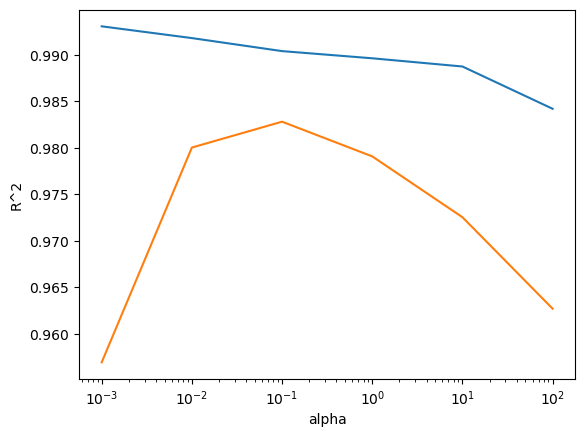

In [45]:
#맷플롯립 임포트, alpha 값 바꿀때마다 score() 메서드의 결과를 저장할 리스트 생성
import matplotlib.pyplot as plt
train_score = []
test_score = []

#alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련 후 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    #릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

#xscale(), yscale() 함수로 축의 눈금을 로그 스케일로 변경하여 그래프 작성
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위는 훈련 세트 그래프, 아래는 테스트 세트 그래프  
왼쪽을 보면 훈련 세트와 테스트 세트의 점수 차이가 아주 큼  
> => 과대적합의 전형적인 모습
오른쪽을 보면 훈련 세트와 테스트 세트의 점수가 모두 낮아짐
> => 과소적합의 전형적인 모습  

적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트 점수가 가장 높은 **10^-1=0.1**  
> => alpha값을 0.1로 하여 최종 모델 훈련

In [46]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386995


### [라쏘 회귀]

라쏘 모델을 훈련하는 것은  
**Ridge 클래스를 Lasso 클래스로 바꾸는 것이 전부**

In [48]:
#훈련 후 훈련 세트 점수 확인
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [49]:
#테스트 세트 점수 확인
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [52]:
#alpha 값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수 계산
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000)
    #라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


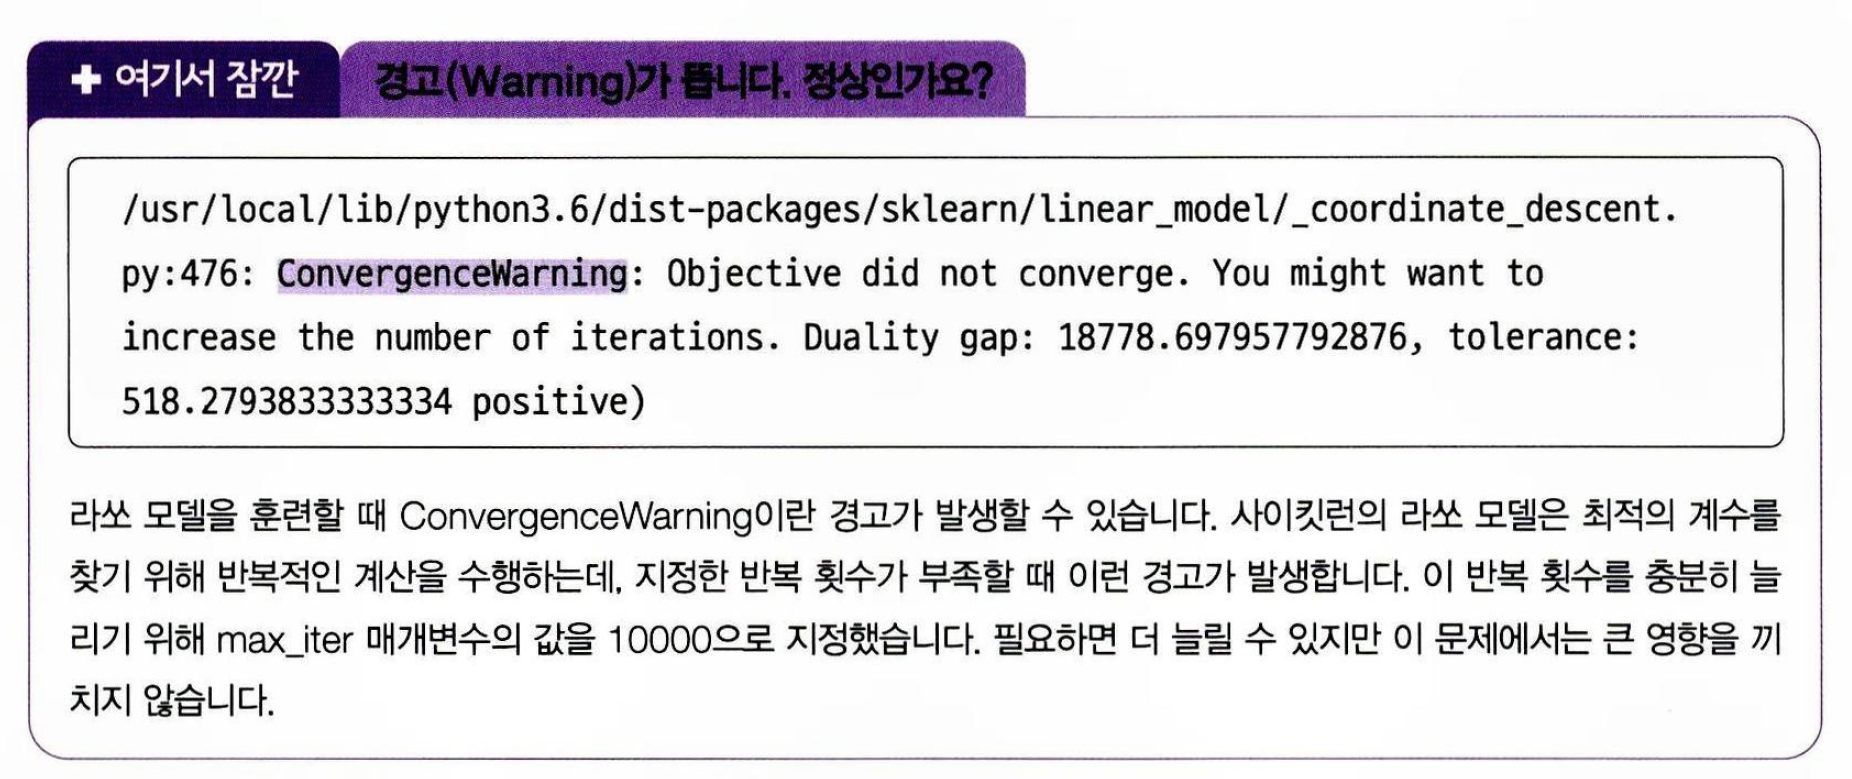

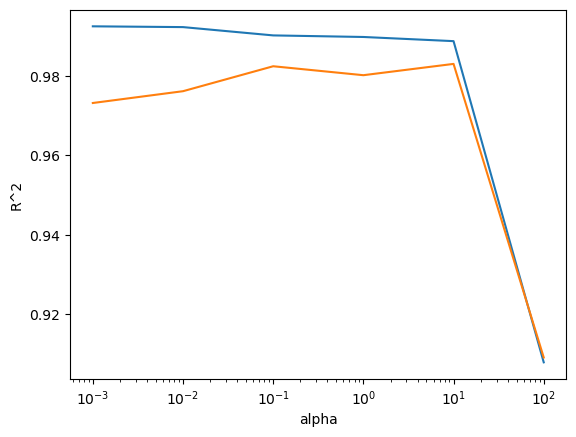

In [54]:
#train_score와 test_score 리스트를 사용해 그래프 생성
#x축 로그 스케일
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

왼쪽: 과대적합  
오른쪽: 훈련 세트와 테스트 세트의 점수가 좁혀지고 있음 -> 가장 오른쪽은 아주 크게 점수가 떨어짐  -> 이 지점은 과소적합되는 모델  
라쏘 모델에서 최적의 alpha 값은 **10^1=10**

In [55]:
#최적의 alpha 값 10으로 훈련
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706695


In [56]:
#라쏘 모델 계수 coef_ 중에서 0인 것 찾기
print(np.sum(lasso.coef_ == 0))

40


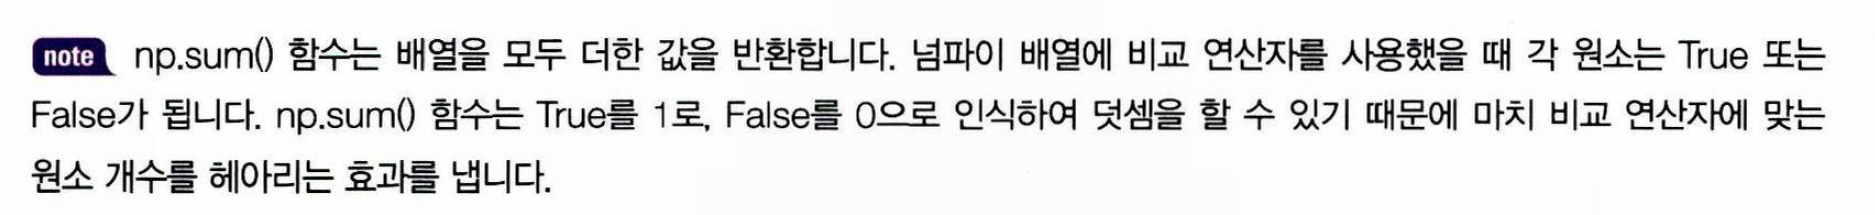

**라쏘 모델**을 **유용한 특성**을 골라내는 용도로 사용

## <<마무리>>

### [키워드로 끝내는 핵심 포인트]
- **다중회귀**: 여러 개의 특성을 사용하는 회귀 모델. 특성이 많으면 강한 성능
- **특성공학**: 주어진 특성을 조합하여 새로운 특성을 만드는 작업 과정
- **릿지**: 규제가 있는 선형 회귀 모델 중 하나. 선형 모델의 계수를 작게 만들어 과대적합을 완화. 
- **라쏘**: 규제가 있는 선형 회귀 모델 중 하나. 릿지와 달리 계수 값을 0으로 만들 수 있음
- **하이퍼파라미터**: 머신러닝 알고리즘이 학습하지 않은 파라미터. 사람이 사전에 지정해주어야 함. ex) 릿지와 라쏘의 alpha 파라미터

### [핵심 패키지와 함수]
#### {pandas}
- **read_csv()**: CSV 파일을 로컬 컴퓨터나 인터넷에서 읽어 판다스 데이터프레임으로 변환하는 함수.
>> 매개변수  
>>> sep: CSV 파일의 구분자를 지정. 기본값: 콤마(, )
>>> header: 데이터프레임 열 이름으로 사용할 CSV 파일의 행 번호 지정. 기본값: 첫 번째 행을 열 이름으로 사용
>>> skiprows: 파일에서 읽기 전에 건너뛸 행의 개수 지정
>>> nrows: 파일에서 읽을 행의 개수 지정
#### {scikit-learn}
- **PolynomialFeatures**: 주어진 특성을 조합하여 새로운 특성을 생성
>>> degree: 최고 차수를 지정. 기본값 : 2
>>> interaction_only: True이면 거듭제곱 항은 제외되고 특성 간의 곱셈 항만 추가. 기본값: False
>>> include_bias: False이면 절편을 위한 특성을 추가하지 않음. 기본값: True
- **Ridge**: 규제가 있는 회귀 알고리즘인 릿지 회귀 모델을 훈련
>>> alpha 매개변수:규제의 강도 조절. alpha값이 클수록 규제 세짐. 기본값: 1
>>> solver 매개변수: 최적의 모델을 찾기 위한 방법을 지정. 기본값: auto (데이터에 따라 자동으로 선택) 
>>> random_state: solver가 'sag'나 'saga'일 때 넘파이 난수 시드값 지정 가능
- **Lasso**: 규제가 있는 회귀 알고리즘인 라쏘 회귀 모델을 훈련
>> 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 **좌표 하강법(coordinate descent)** 사용
>>> alpha와 random_state 매개변수는 Ridge 클래스와 동일
>>> max_iter: 알고리즘의 수행 반복 횟수 지정. 기본값: 1000